# Vector Representation

Implementing vector representation in a population code using the Neural Engineering Framework.

**Response function** maps current to frequency.

**Tuning curve** maps scalar to frequency.

In [1]:
%matplotlib inline

import numpy as np
import theano
import theano.tensor as T

import matplotlib.pyplot as plt

from neural.neuron_group import NeuronGroup

In [91]:
N = NeuronGroup(1, 0.02, 0.2, -65.0, 8)
now = 0

injected = np.arange(0.0, 250.0, 1.0)
frequency = []

for dc in injected:
    for i in range(0, 50):
        N.tick(now, np.zeros(N.size, dtype=theano.config.floatX))
        now += 1

    t = 250
    sm = 0.0
    for i in range(0, t):
        N.tick(now, np.ones(N.size, dtype=theano.config.floatX) * dc)
        now += 1
        sm += N.rate.get_value()[0]

    frequency.append(sm / t)

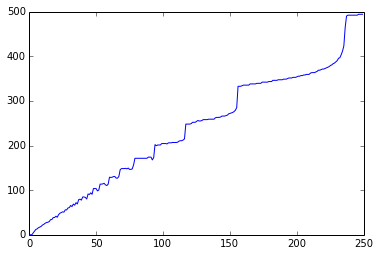

In [92]:
plt.plot(injected, frequency)

## Encoding

In [14]:
x = T.scalar("x") # encoded value
alpha = T.vector("alpha") # scales magnitude of x to match tuning curves

J_threshold = T.vector("J_threshold") # current threshold
J_bias = T.vector("J_bias") # background current

tau_ref = T.vector("tau_ref") # refractory period
tau_RC = T.vector("tau_RC") # RC time constant

In [26]:
J = theano.function([x, alpha, J_bias], alpha * x + J_bias)

In [29]:
N = 100
x_ = np.arange(-1, 1, 2. / N)
alpha_ = np.arange(0, 1, 0.01)
J_bias_ = np.arange(0, 1, 0.01)
J_x = J(x_, alpha_, J_bias_)

In [30]:
G_expr = T.switch(T.gt(alpha * x + J_bias, J_threshold), \
                  1 / (tau_ref - tau_RC * T.log(1 - J_threshold / J_x)), \
                  0)
G = theano.function([x, alpha, J_bias, J_threshold, tau_ref, tau_RC], \
                    G_expr, name="G")

In [32]:
J_threshold_ = np.arange(0, 1, 0.01)
tau_ref_ = np.arange(0, 1, 0.01)
tau_RC_ = np.arange(0, 1, 0.01)
G_x = G(x_, alpha_, J_bias_, J_threshold_, tau_ref_, tau_RC_)

In [37]:
a_x = G_x # firing rate

## Decoding

In [46]:
phi = T.vector("phi")